In [1]:
from significance_of_mean_cuda import significance_of_mean_cuda
from utils import significance_of_mean, getdf, my_scatter_plot
import numpy as np
import time
import multiprocessing
import concurrent.futures as cf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn
import time
from scipy.stats import ttest_ind, ttest_rel, chisquare, ks_2samp
import pandas as pd
import seaborn as sns

import matplotlib as mpl

mpl.rcParams['text.usetex'] = False  # not really needed

from scipy import stats
from scipy.stats import mannwhitneyu

### Calibration-plot

In [287]:
from scipy import stats
def r2(x, y):
    z=(x-y)/y
    z_abs = np.abs(z)
    return np.mean(z_abs)

def my_scatter_plot(df,save_name):
    sns.set(style="white")
    sns.set_context("talk")
    low = min(df["Theoretical p-value"])
    hi = max(df["Theoretical p-value"])
    f, ax = plt.subplots(figsize=(7, 7))
    ax.set(xscale="log", yscale="log")
    
    #err2 = r2(df["Observed p-value"], df["Theoretical p-value"])
    
    g=sns.regplot(x='Theoretical p-value', y ='Observed p-value', data=df,  ax=ax, fit_reg=False, 
                  scatter_kws={"s": 5})
    g.plot([low,hi], [low,hi], 'k-', linewidth=.5)
    
    sns.despine()
    #plt.title("Mean relative error : {}".format(np.around(err2,6)))
    f.tight_layout()
    f.savefig(save_name)

In [1]:
def exactTest(A,B, bins=10):
    SGM = significance_of_mean_cuda(bins, dtype_v=np.uint16,dtype_A=np.uint64)
    SGM.run(np.asarray(A),np.asarray(B))
    
    return SGM.get_p_values()

def MW(A, B):
    p_mw = list()
    for a,b in zip(A, B):
        p_mw.append(mannwhitneyu(a,b, alternative="less")[1])
    return p_mw

def ttests(A,B):
    p_t = list()
    for x, y in zip(A, B):
            
        t, p = ttest_ind(y, x)
        p = p/2
        if t<0:
            p = 1-p
       
        p_t.append(p)
    return p_t


In [2]:
def getPATH(path, suffix, prefix):
    return path + '/'+ suffix + '/' + prefix

In [3]:
path = "figures/paralellVsFastApprox"

# Set size 20 and sample size 10000

In [4]:
set_n = 20
sample_n = 20_000

# $N(0,1)$

In [6]:
import numpy as np

In [7]:

AN, BN = [np.random.normal(0,1,set_n) for i in range(sample_n)], [np.random.normal(0,1,set_n) for i in range(sample_n)]


In [10]:
np.asarray(BN).shape

(20000, 20)

# Exact test

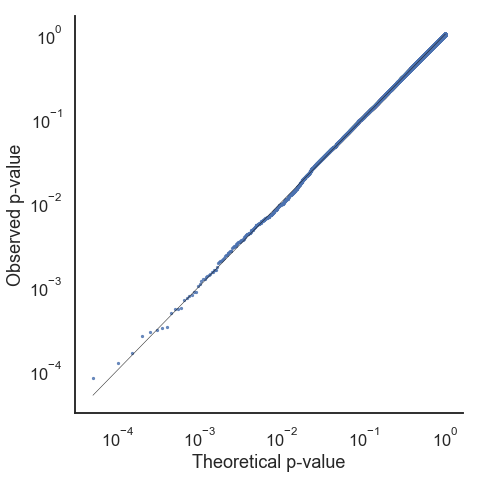

In [321]:
pDfExact = getdf(exactTest(AN, BN, 50), sample_n)
my_scatter_plot(pDfExact,"figures/calibration/largeSample_10000_20/e_norm_0_1_50")

# Mann-Whitney

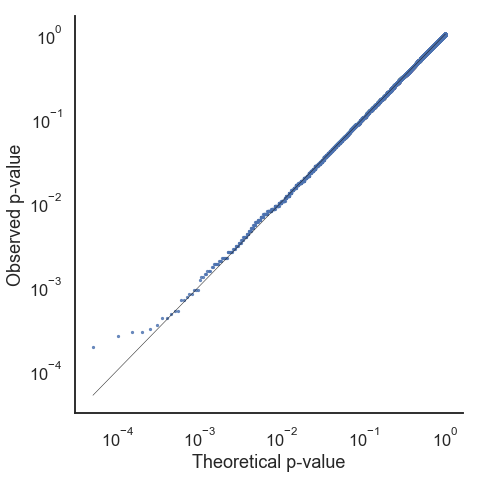

In [322]:
pDfMW = getdf(MW(AN, BN), sample_n)
my_scatter_plot(pDfMW,"figures/calibration/largeSample_10000_20/mw_norm_0_1_50")

# ttest

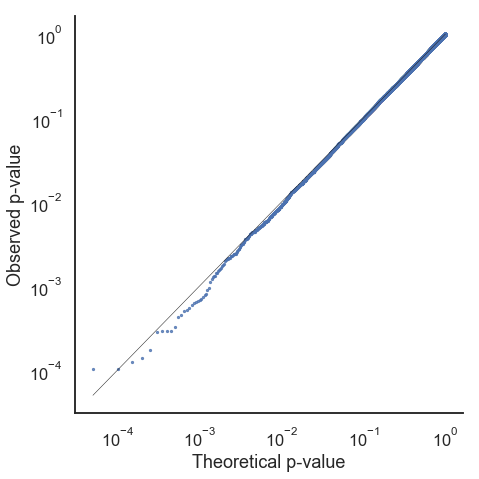

In [323]:
pDfTtest = getdf(ttests(AN, BN), sample_n)
my_scatter_plot(pDfTtest,"figures/calibration/largeSample_10000_20/t_norm_0_1_50")

# $log N(0,2)$

In [324]:
std = 2

In [325]:
ALn, BLn = [np.random.lognormal(0,std,set_n) for i in range(sample_n)], [np.random.lognormal(0,std,set_n) for i in range(sample_n)]


# Exact test

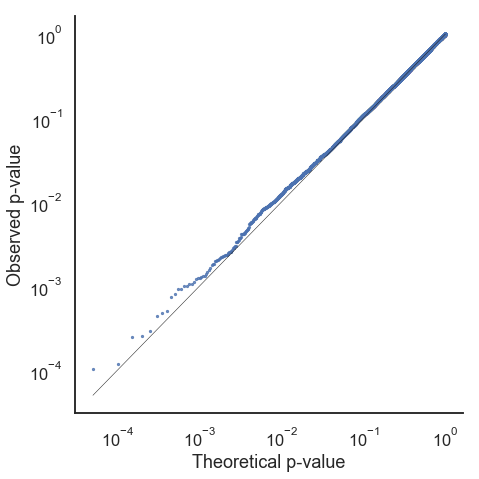

In [326]:
pDfExact = getdf(exactTest(ALn, BLn, 50), sample_n)
my_scatter_plot(pDfExact,"figures/calibration/largeSample_10000_20/e_Lnorm_0_1_50")

# Mann Whitney

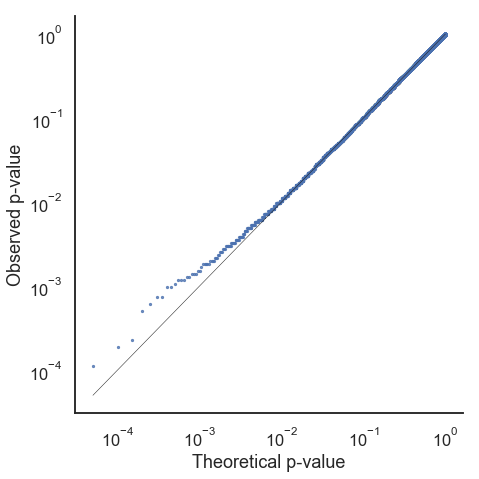

In [327]:
pDfMW = getdf(MW(ALn, BLn), sample_n)
my_scatter_plot(pDfMW,"figures/calibration/largeSample_10000_20/mw_Lnorm_0_1_50")

# ttest

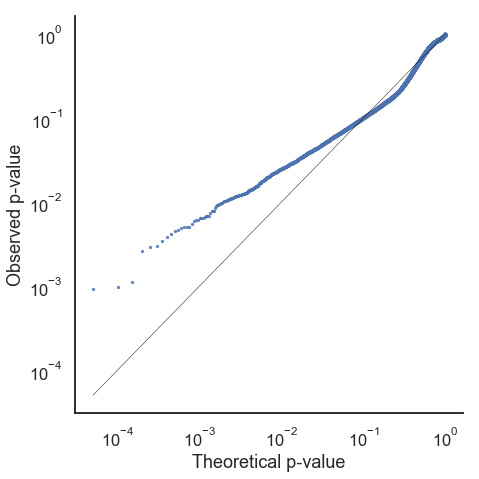

In [328]:
pDfTtest = getdf(ttests(ALn, BLn), sample_n)
my_scatter_plot(pDfTtest,"figures/calibration/largeSample_10000_20/t_Lnorm_0_1_50")